In [9]:
import pandas as pd
import matplotlib as plt
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
data = pd.read_csv('ALLHPD_DATA.csv')
data = data.drop(['Unnamed: 7','Unnamed: 15'],axis=1)
data['D_co'] = pd.to_numeric(data['D_co'], errors='coerce')
data['D_pm25'] = pd.to_numeric(data['D_pm25'], errors='coerce')
data['D_pm10'] = pd.to_numeric(data['D_pm10'], errors='coerce')
data['D_o3'] = pd.to_numeric(data['D_o3'], errors='coerce')
data['D_no2'] = pd.to_numeric(data['D_no2'], errors='coerce')
data['D_so2'] = pd.to_numeric(data['D_so2'], errors='coerce')
data['P_co'] = pd.to_numeric(data['P_co'], errors='coerce')
data['P_pm25'] = pd.to_numeric(data['P_pm25'], errors='coerce')
data['P_pm10'] = pd.to_numeric(data['P_pm10'], errors='coerce')
data['P_o3'] = pd.to_numeric(data['P_o3'], errors='coerce')
data['P_no2'] = pd.to_numeric(data['P_no2'], errors='coerce')
data['P_so2'] = pd.to_numeric(data['P_so2'], errors='coerce')
data.info()
data = data.drop(['date.1','date.2'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    364 non-null    object 
 1   H_pm25  359 non-null    float64
 2   H_pm10  90 non-null     object 
 3   H_o3    359 non-null    object 
 4   H_no2   359 non-null    object 
 5   H_so2   359 non-null    object 
 6   H_co    359 non-null    object 
 7   date.1  362 non-null    object 
 8   D_pm25  321 non-null    float64
 9   D_pm10  360 non-null    float64
 10  D_o3    360 non-null    float64
 11  D_no2   355 non-null    float64
 12  D_so2   359 non-null    float64
 13  D_co    357 non-null    float64
 14  date.2  364 non-null    object 
 15  P_pm25  181 non-null    float64
 16  P_pm10  179 non-null    float64
 17  P_o3    175 non-null    float64
 18  P_no2   177 non-null    float64
 19  P_so2   164 non-null    float64
 20  P_co    72 non-null     float64
dtypes: float64(13), object(8)
memory usage:

In [2]:
data.plot(figsize=(20,10))

In [3]:
data['date']= pd.to_datetime(data['date'])
data = data.set_index('date')

In [4]:
data.isnull().sum()

H_pm25      5
H_pm10    274
H_o3        5
H_no2       5
H_so2       5
H_co        5
D_pm25     43
D_pm10      4
D_o3        4
D_no2       9
D_so2       5
D_co        7
P_pm25    183
P_pm10    185
P_o3      189
P_no2     187
P_so2     200
P_co      292
dtype: int64

In [5]:
data[['D_pm25','D_pm10','D_o3','D_no2','D_so2','D_co']]=data[['D_pm25','D_pm10','D_o3','D_no2','D_so2','D_co']].bfill()
data[['H_pm25','H_pm10','H_o3','H_no2','H_so2','H_co']]=data[['H_pm25','H_pm10','H_o3','H_no2','H_so2','H_co']].bfill()

In [6]:
data = data.bfill()

In [7]:
d = data[['H_pm25','D_pm25']]

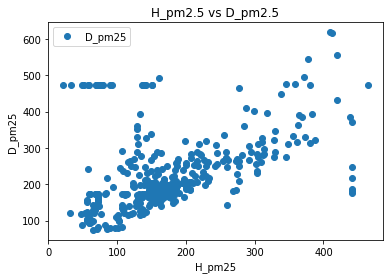

In [10]:
d.plot(x='H_pm25', y='D_pm25', style='o')  
plt.title('H_pm2.5 vs D_pm2.5')  
plt.xlabel('H_pm25')  
plt.ylabel('D_pm25')  
plt.show()

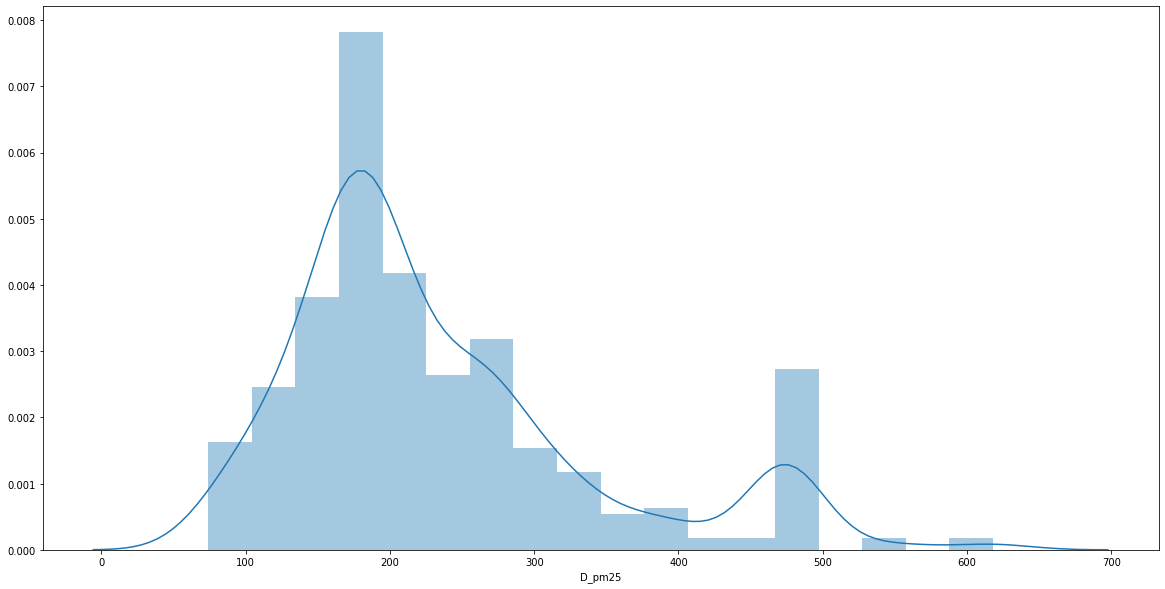

In [11]:
plt.figure(figsize=(20,10))
plt.tight_layout()
seabornInstance.distplot(d['D_pm25'])

In [12]:
X = d['H_pm25'].values.reshape(-1,1)
y = d['D_pm25'].values.reshape(-1,1)

In [13]:
from sklearn.svm import SVR

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
support_regressor = SVR(kernel='rbf', C=1000)
support_regressor.fit(X_train, y_train)

/home/umer/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
print(support_regressor.intercept_)

[271.21141564]


In [16]:
y_pred = support_regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,174.0,177.484301
1,217.0,144.367889
2,194.0,197.921638
3,140.0,178.905651
4,203.0,180.233917
...,...,...
68,143.0,142.153349
69,202.0,179.705194
70,174.0,160.897865
71,79.0,154.996323


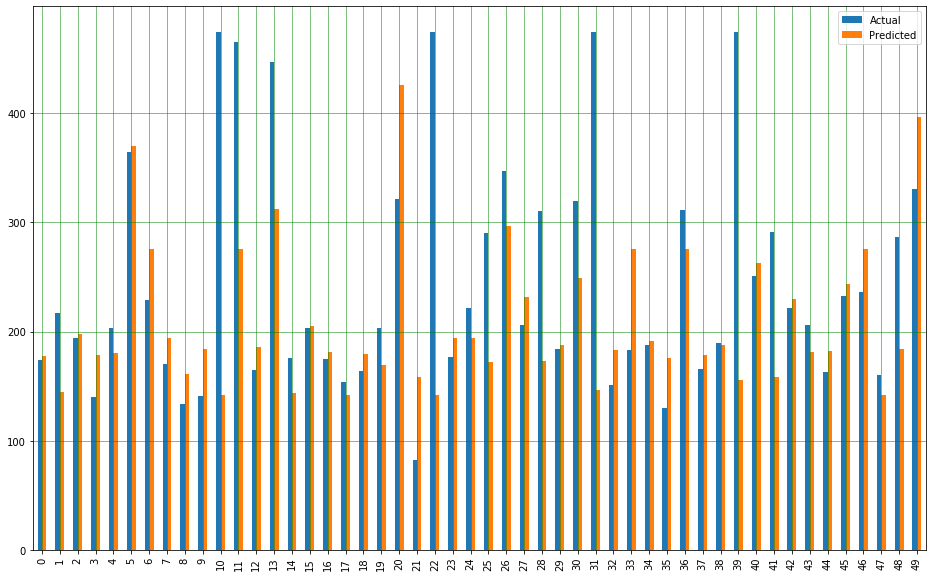

In [17]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

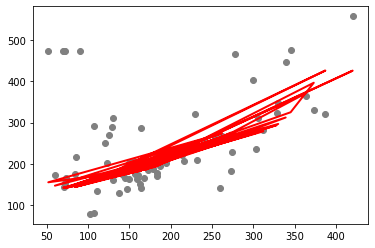

In [18]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 64.37682706328464
Mean Squared Error: 11196.193041441273
Root Mean Squared Error: 105.81206472534818
